# DESCRIPTION

### Background of Problem Statement :

The US Census Bureau has published California Census Data which has 10 types of metrics such as the population, median income, median housing price, and so on for each block group in California. The dataset also serves as an input for project scoping and tries to specify the functional and nonfunctional requirements for it.

### Problem Objective :

The case study aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.

Districts or block groups are the smallest geographical units for which the US Census Bureau
publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset.

**Domain:** Finance and Housing

**Analysis Tasks to be performed:**

1. Build a model of housing prices to predict median house values in California using the provided dataset.

2. Train the model to learn from the data to predict the median housing price in any district, given all the other metrics.

3. Predict housing prices based on median_income and plot the regression chart for it.

**1. Load the data :**
- Read the “housing.csv” file from the folder into the program.
- Print first few rows of this data.
- Extract input (X) and output (Y) data from the dataset.

**2. Handle missing values :**
- Fill the missing values with the mean of the respective column.

**3. Encode categorical data :**
- Convert categorical column in the dataset to numerical data.

**4. Split the dataset :** 
- Split the data into 80% training dataset and 20% test dataset.

**5. Standardize data :**
- Standardize training and test datasets.

**6. Perform Linear Regression :** 
- Perform Linear Regression on training data.
- Predict output for test dataset using the fitted model.
- Print root mean squared error (RMSE) from Linear Regression.

**7. Perform Linear Regression with one independent variable :**
- Extract just the median_income column from the independent variables (from X_train and X_test).
- Perform Linear Regression to predict housing values based on median_income.
- Predict output for test dataset using the fitted model.
- Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.

### Dataset Description :

**longitude	(signed numeric - float) :** Longitude value for the block in California, USA  
**latitude	(numeric - float ) :** Latitude value for the block in California, USA  
**housing_median_age	(numeric - int ) :** Median age of the house in the block  
**total_rooms	(numeric - int ) :** Count of the total number of rooms (excluding bedrooms) in all houses in the block  
**total_bedrooms	(numeric - float ) :** Count of the total number of bedrooms in all houses in the block  
**population	(numeric - int ) :** Count of the total number of population in the block  
**households	(numeric - int ) :** Count of the total number of households in the block  
**median_income	(numeric - float ) :** Median of the total household income of all the houses in the block  
**ocean_proximity	(numeric - categorical ) :** Type of the landscape of the block [ Unique Values : 'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'  ]  
**median_house_value	(numeric - int ) :** Median of the household prices of all the houses in the block

In [1]:
#importing required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt, style
import seaborn as sns
import re

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### 1. Load the data:

In [4]:
#importing housing price dataset
df_housing_price = pd.read_excel("data/1553768847_housing.xlsx")

#top 5 records of the dataset
df_housing_price.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [5]:
#statistical details of the dataset (numerical data)
df_housing_price.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
#statistical details of the dataset (categorical data)
df_housing_price.describe(include = ["object"])

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


- 'ocean_proximity' attribute is the only categorical data in the dataset.

In [7]:
#concise summary of the dataset to get the information about column dtypes, non-null values etc.
df_housing_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


# Data Cleaning

### 2. Handle missing values:

In [8]:
#checking for null values in the dataset
df_housing_price.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

- From the above output it can be seen that there are null/missing values for 'total_bedrooms' attribute. It is hard to perform any kind of computation on the dataset which contains null values and it must be fixed.

In [9]:
#filling the null values of the attribute 'total_bedroomes' with its mean value
df_housing_price.fillna(np.mean(df_housing_price.total_bedrooms), inplace = True)

#confirming the dataframe has any null values or not
df_housing_price.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

- It can be seen that the attribute 'total_bedrooms' has no null values now.

In [10]:
#checking for duplicate values in the dataset
df_housing_price.duplicated().sum()

np.int64(0)

# Data Preparation

In [11]:
#list of categories of 'ocean_proximity' attribute
df_housing_price.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

- Hence there are total 5 categories of data in 'ocean_proximity' attribute. When we are doing machine learning, we’ll work with algorithms that cannot process categorical variables. In this case we will convert our categorical column (i.e. 'ocean_proximity') into indicator columns (columns of 0s and 1s).

### 3. Encode categorical data :

In [12]:
#converting categorical variable into dummy/indicator variable
df_housing_price = pd.get_dummies(data =df_housing_price, columns=["ocean_proximity"])

df_housing_price.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,False,False,False,True,False
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,False,False,False,True,False
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,False,False,False,True,False
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,False,False,False,True,False
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,False,False,False,True,False


- 1 is True indicator and 0 is False indicator. This is a way to identify one of our values.

In [13]:
#checking the dataset for confirmation about the availability of any categorical attribute
df_housing_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  int64  
 3   total_rooms                 20640 non-null  int64  
 4   total_bedrooms              20640 non-null  float64
 5   population                  20640 non-null  int64  
 6   households                  20640 non-null  int64  
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  int64  
 9   ocean_proximity_<1H OCEAN   20640 non-null  bool   
 10  ocean_proximity_INLAND      20640 non-null  bool   
 11  ocean_proximity_ISLAND      20640 non-null  bool   
 12  ocean_proximity_NEAR BAY    20640 non-null  bool   
 13  ocean_proximity_NEAR OCEAN  206

- No categorical attribute available in the dataset. Now we can build the model.

## Model Building

### Instantiating Estimators:

In [14]:
#Standard Scalar Object
stdScalar = StandardScaler()


#Linear Estimator Object
LineRegg = LinearRegression()

### Selecting Features And Target Variables:

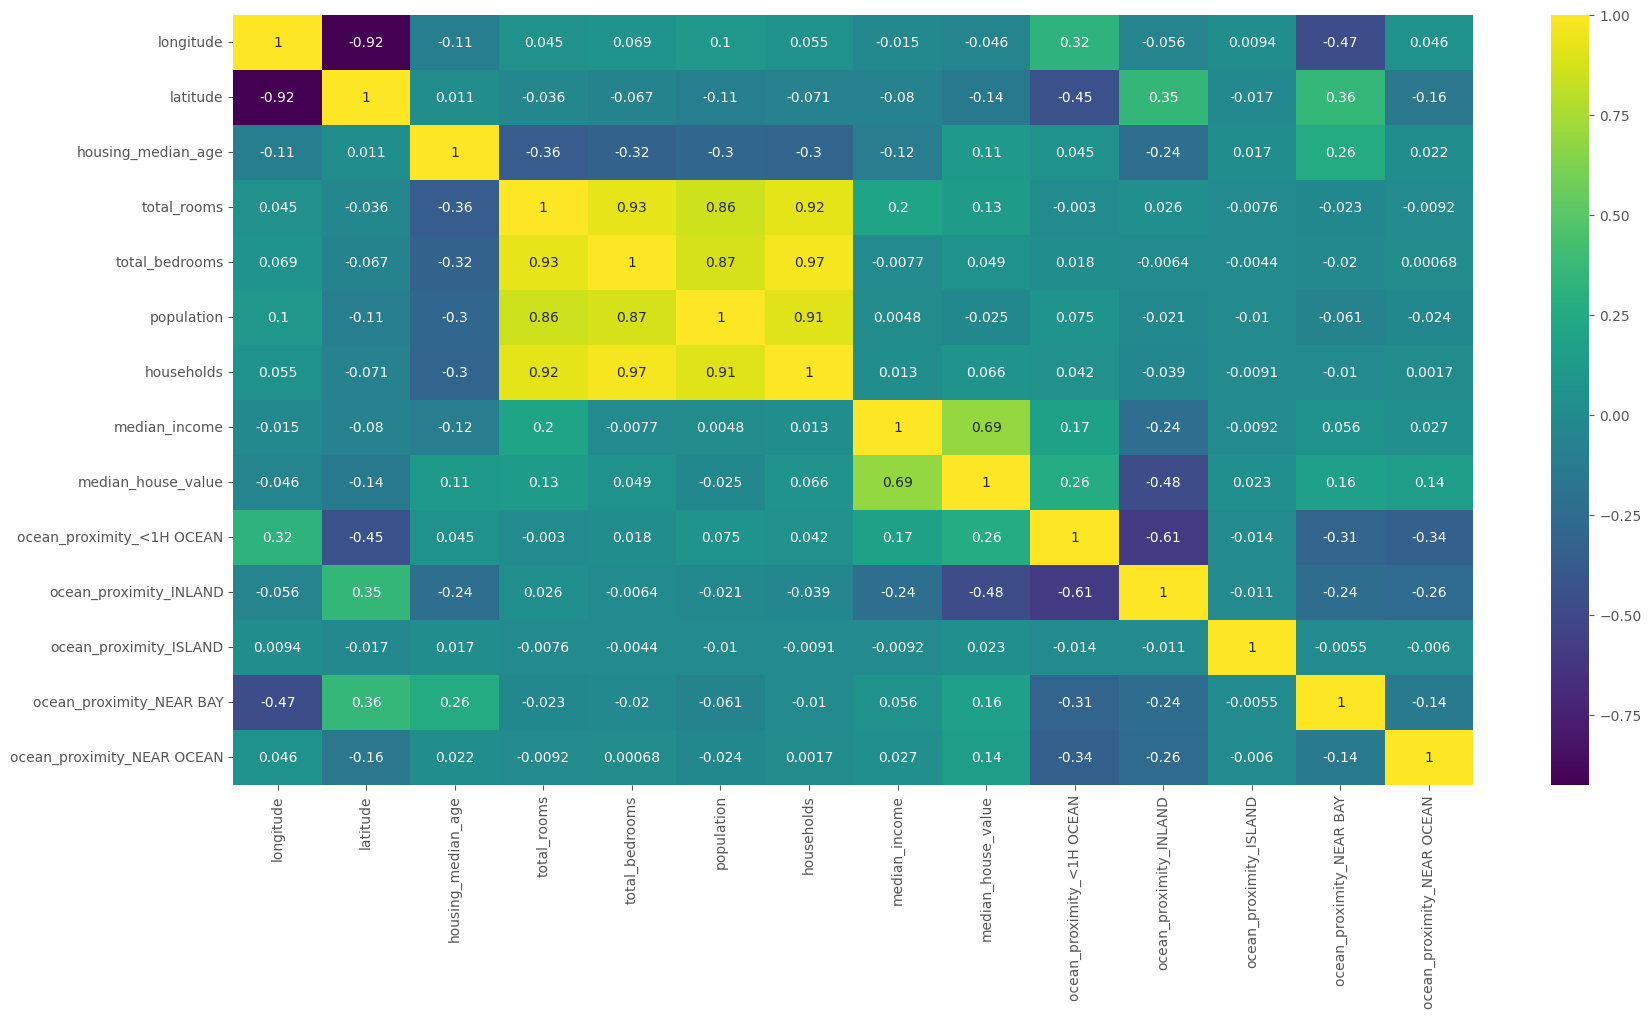

In [15]:
#checking for correlations
style.use('ggplot')
plt.figure(figsize=(20,10))
sns.heatmap(df_housing_price.corr(), annot = True, cmap = "viridis")
plt.show()

In [16]:
#extracting input (x) and output (y) data from the dataset.
x = df_housing_price.drop(columns="median_house_value")
y = df_housing_price[['median_house_value']]
print(x)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       population  households  median_income  ocean

In [17]:
print(y)

       median_house_value
0                  452600
1                  358500
2                  352100
3                  341300
4                  342200
...                   ...
20635               78100
20636               77100
20637               92300
20638               84700
20639               89400

[20640 rows x 1 columns]


### 4. Split the dataset :

In [18]:
#splitting the data into 80% training dataset and 20% test dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, train_size = 0.80, random_state = 1)

print("Train data size:", x_train.shape)
print("Test data size:", x_test.shape)

Train data size: (16512, 13)
Test data size: (4128, 13)


### 5. Standardize data :

- __standardizing training and test datasets:__

In [19]:
# train object
stdScalar.fit(x_train)

#tranform and get standardized value for train and test
x_train_std = stdScalar.transform(x_train)
x_test_std = stdScalar.transform(x_test)

### 6. Perform Linear Regression : 

- __Perform Linear Regression on training data:__

In [20]:
#train the model
LineRegg.fit(x_train_std,y_train)

LinearRegression()

In [21]:
#test training and testing Score
print("Train Score : ", LineRegg.score(x_train_std,y_train))
print("Test Score  : ", LineRegg.score(x_test_std,y_test))

Train Score :  0.6471489364713472
Test Score  :  0.6378272128072089


- __Predict output for test dataset using the fitted model:__

In [22]:
#predicting output for test dataset
predicted_op = pd.DataFrame(LineRegg.predict(x_test_std))

- __Print root mean squared error (RMSE) from Linear Regression:__

In [23]:
print(np.sqrt(mean_squared_error(y_test,predicted_op)))
print(np.sqrt(mean_squared_error(y_train,LineRegg.predict(x_train))))

68924.50425995354
8.2126636519761e+17


/Users/abhinandansamal/anaconda3/envs/cal_house_price/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


(0.0, 510000.0)

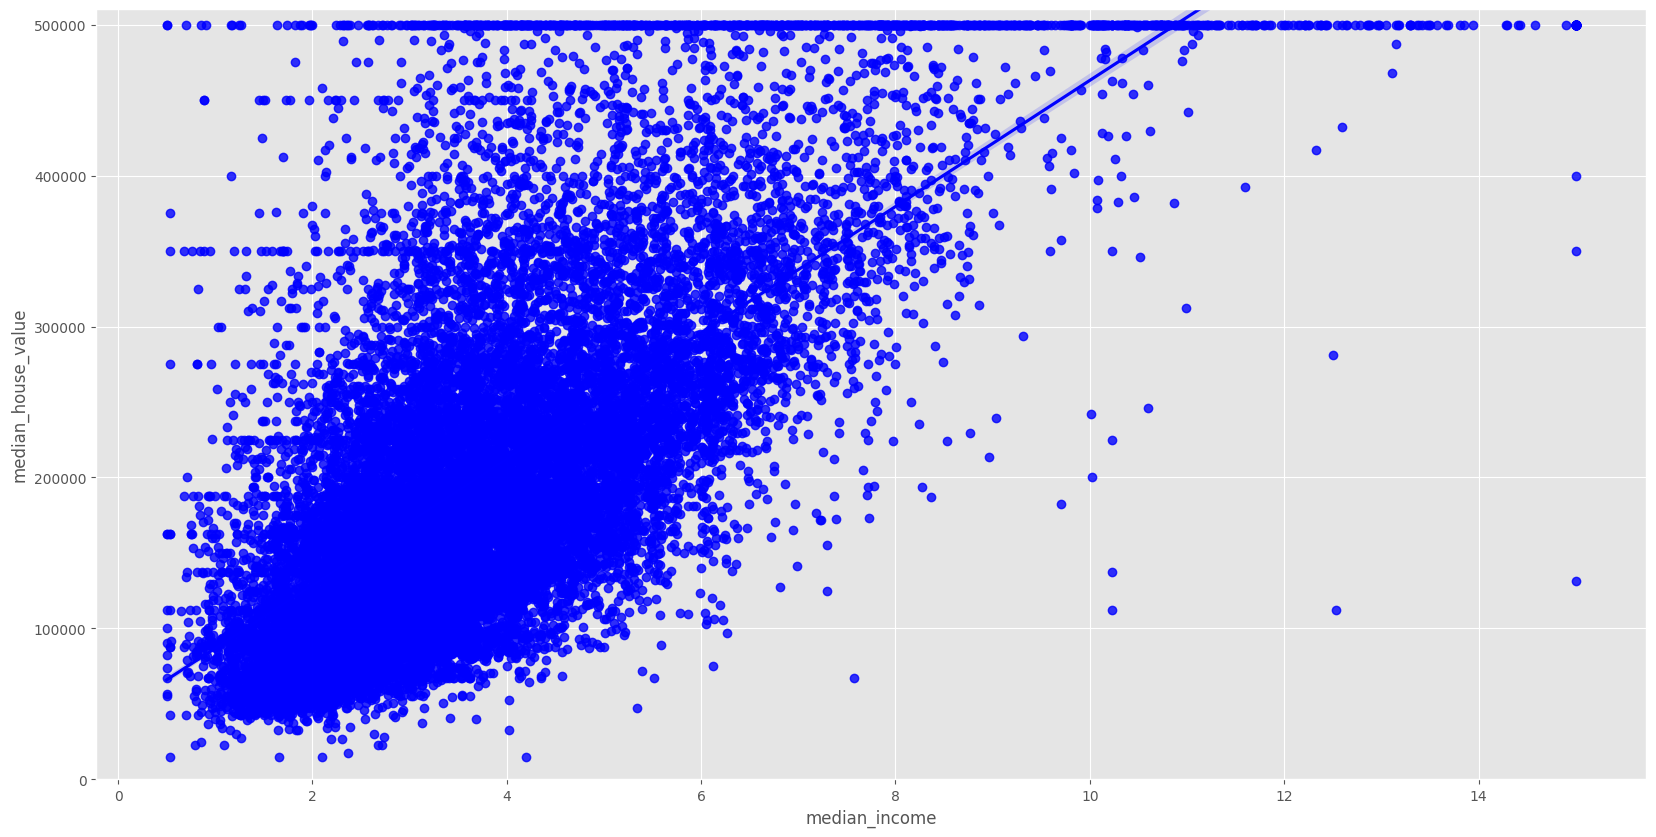

In [24]:
#plotting the model
plt.figure(figsize=(20,10))
sns.regplot(data = df_housing_price, x = 'median_income', y = 'median_house_value', marker ='o', color = "b")
plt.ylim(0,510000)

### 7. Bonus exercise: Perform Linear Regression with one independent variable :

- __Extract just the median_income column from the independent variables (from X_train and X_test):__

In [25]:
x_median_col_train = x_train[['median_income']].copy()
x_median_col_test = x_test[['median_income']].copy()

- __Perform Linear Regression to predict housing values based on median_income:__

In [26]:
# Instantiate Estimator
lineRegg_median_col = LinearRegression()

#train Model
lineRegg_median_col.fit(x_median_col_train, y_train)

LinearRegression()

- __Predict output for test dataset using the fitted model:__

In [27]:
y_median_col_pred = lineRegg_median_col.predict(x_median_col_test)
y_median_col_pred

array([[181402.07011843],
       [127924.35050918],
       [213498.79519375],
       ...,
       [257017.78249451],
       [249742.18836711],
       [158498.66802721]])

- __Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data:__

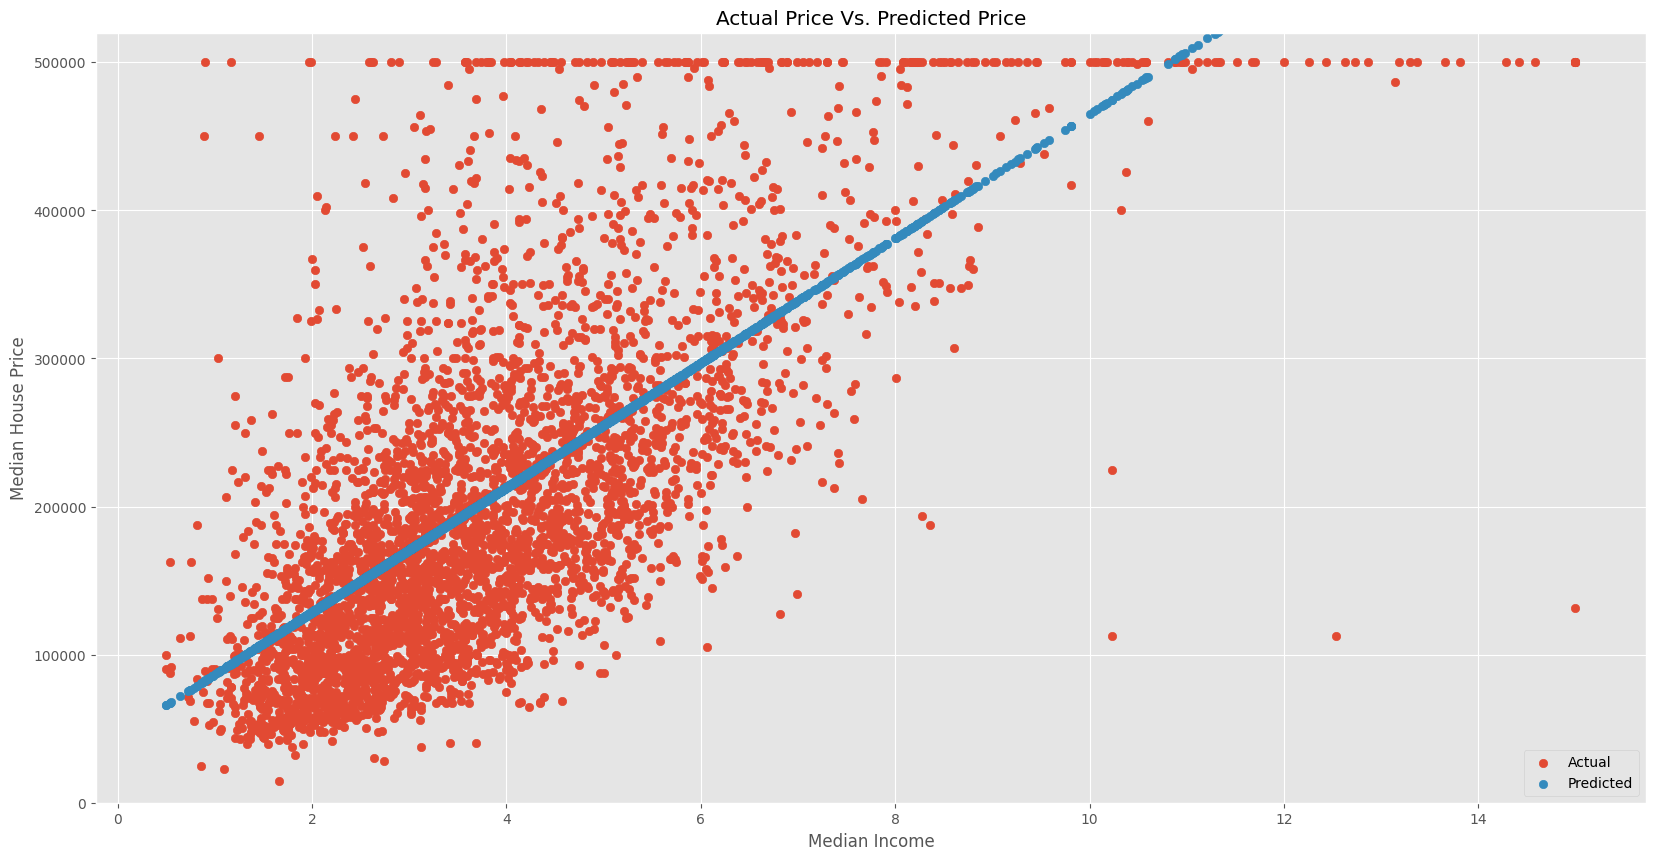

In [28]:
plt.figure(figsize=(20,10))
plt.scatter(x_median_col_test, y_test, label = "Actual")
plt.scatter(x_median_col_test, y_median_col_pred, label = "Predicted")
plt.xlabel("Median Income")
plt.ylabel("Median House Price")
plt.title("Actual Price Vs. Predicted Price")
plt.ylim(0,520000)
plt.legend(loc ="lower right")
plt.show()

In [29]:
#test Training and Testing Score
print("Train Score : ", lineRegg_median_col.score(x_median_col_train,y_train))
print("Test Score  : ", lineRegg_median_col.score(x_median_col_test,y_test))

Train Score :  0.4736104113554326
Test Score  :  0.4719083593446771


In [30]:
#RMSE Score
print(np.sqrt(mean_squared_error(y_test,y_median_col_pred)))
print(np.sqrt(mean_squared_error(y_train,lineRegg_median_col.predict(x_median_col_train))))

83228.17849797675
83864.426187912
